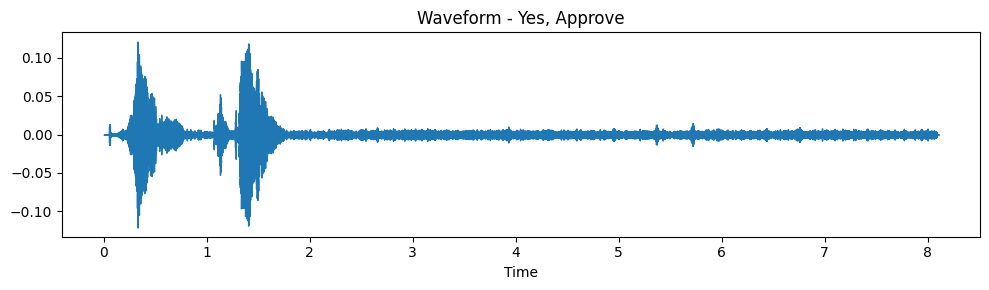

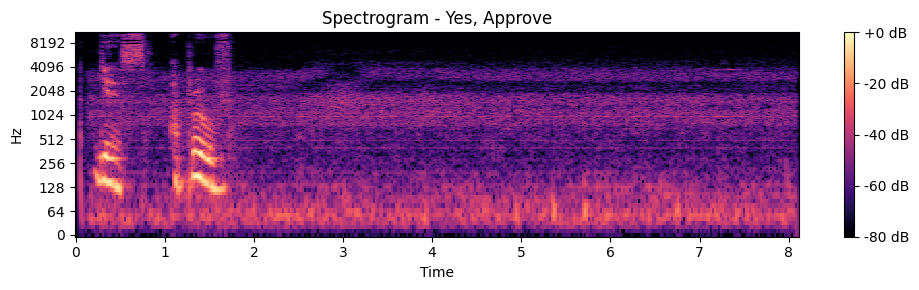

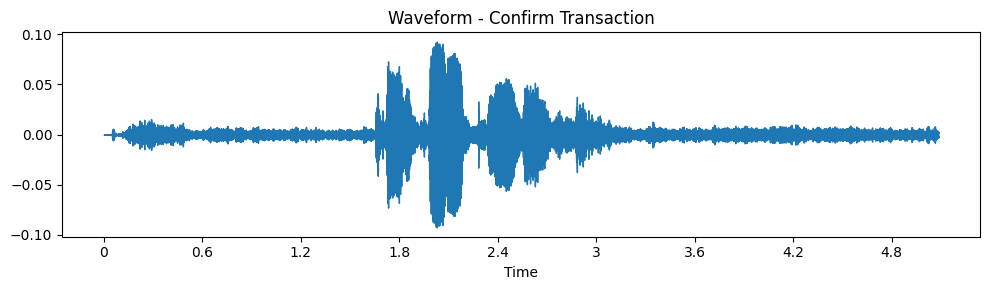

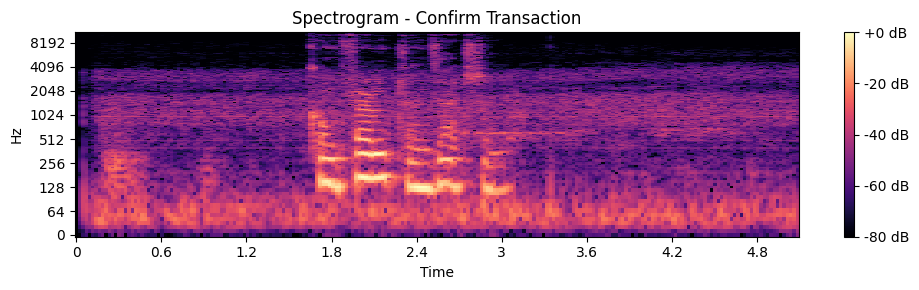

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to load and plot waveform and spectrogram
def visualize_audio(file_path, title):
    y, sr = librosa.load(file_path)

    # Waveform
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {title}")
    plt.tight_layout()
    plt.show()

    # Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(10, 3))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f"Spectrogram - {title}")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

    return y, sr

# Example usage
y1, sr1 = visualize_audio('KG_25_Avenue.wav', 'Yes, Approve')
y2, sr2 = visualize_audio('KG_25_Avenue_3.wav', 'Confirm Transaction')


In [4]:
import soundfile as sf

def apply_augmentations(y, sr, base_name):
    aug_files = []

    # 1. Time Stretch
    y_stretch = librosa.effects.time_stretch(y, rate=1.25)
    file1 = f"{base_name}_stretch.wav"
    sf.write(file1, y_stretch, sr)
    aug_files.append(file1)

    # 2. Pitch Shift
    y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)
    file2 = f"{base_name}_pitch.wav"
    sf.write(file2, y_pitch, sr)
    aug_files.append(file2)

    # 3. Add Background Noise
    noise = 0.003 * np.random.randn(len(y))
    y_noise = y + noise
    file3 = f"{base_name}_noise.wav"
    sf.write(file3, y_noise, sr)
    aug_files.append(file3)

    return aug_files

# Augment both original recordings
augmented_yes = apply_augmentations(y1, sr1, 'yes_approve')
augmented_confirm = apply_augmentations(y2, sr2, 'confirm_transaction')


In [6]:
import pandas as pd

def extract_features(file):
    y, sr = librosa.load(file)

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs)

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = np.mean(rolloff)

    energy = np.sum(y ** 2) / len(y)

    return {
        "filename": file,
        "mfcc_mean": mfccs_mean,
        "rolloff_mean": rolloff_mean,
        "energy": energy
    }

# List all files to extract features
all_files = ["KG_25_Avenue.wav", "KG_25_Avenue_3.wav"] + augmented_yes + augmented_confirm

# Extract features
features = [extract_features(f) for f in all_files]
df = pd.DataFrame(features)

# Save to CSV
df.to_csv("audio_features.csv", index=False)
print("✅ Features saved to audio_features.csv")

✅ Features saved to audio_features.csv


In [ ]:
import os


#to avoid crashing
def extract_features(file):
    if not os.path.exists(file):
        print(f"⚠️ Skipping missing file: {file}")
        return None
    
    y, sr = librosa.load(file)

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs)

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = np.mean(rolloff)

    energy = np.sum(y ** 2) / len(y)

    return {
        "filename": file,
        "mfcc_mean": mfccs_mean,
        "rolloff_mean": rolloff_mean,
        "energy": energy
    }
